In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [147]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [148]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [149]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [150]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [151]:
df.flower.unique()

array([0, 1, 2])

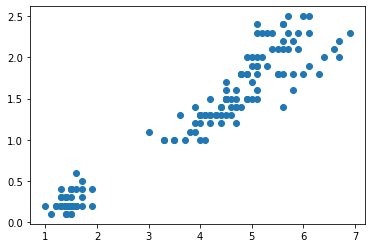

In [152]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'],)

In [153]:
df0 = df[df.flower == 0]
df1 = df[df.flower == 1]
df2 = df[df.flower == 2]

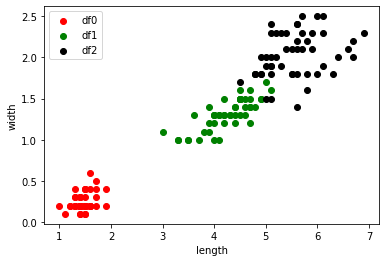

In [154]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', label='df0')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green', label='df1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='black', label='df2')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()

In [155]:
df1 = df.drop(['sepal length (cm)', 'sepal width (cm)'],axis='columns').copy()
df1.head()

,petal length (cm),petal width (cm),flower
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [156]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [157]:
y_pred = km.fit_predict(df1[['petal length (cm)', 'petal width (cm)']])

In [158]:
df1['cluster2'] = y_pred
df1.head()

,petal length (cm),petal width (cm),flower,cluster2
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


In [159]:
cl0 = df1[df1.cluster2 == 0]
cl1 = df1[df1.cluster2 == 1]
cl2 = df1[df1.cluster2 == 2]

In [160]:
centroid = km.cluster_centers_
centroid

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

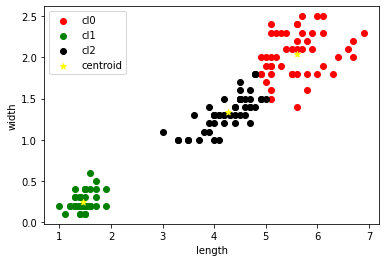

In [161]:
plt.scatter(cl0['petal length (cm)'], cl0['petal width (cm)'], color='red', label='cl0')
plt.scatter(cl1['petal length (cm)'], cl1['petal width (cm)'], color='green', label='cl1')
plt.scatter(cl2['petal length (cm)'], cl2['petal width (cm)'], color='black', label='cl2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', label='centroid', marker='*')
plt.xlabel('length')
plt.ylabel('width')
plt.legend()

In [162]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit_predict(df1[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [163]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.48300089968511,
 13.91690875790876,
 11.040239971910458,
 9.191170634920635,
 7.669666305916308,
 6.456494541406302]

Text(0, 0.5, 'sse')

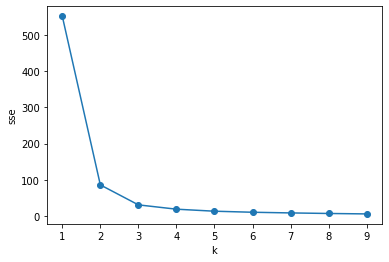

In [164]:
plt.plot(k_range, sse)
plt.scatter(k_range, sse)
plt.xlabel('k')
plt.ylabel('sse')
